In [19]:
import pandas as pd
import numpy as np
import os

code = "48_40_5_6"
mask = 0.3
# code = "60_50_5_6"

# checking to see if failures get bigger random errors

# full_path = os.path.realpath(__file__)
# path, filename = os.path.split(full_path)
# filename = os.path.join(path, f"./data/{code}_cluster_size.res")

def process_data(code, mask, type):
    # type is 'cluster' or 'error'
    df = pd.read_csv(f"./data/{mask}/{code}_{type}_size.res", sep=';', header=None)

    cols = [str(i) for i in range(len(df.iloc[0]))]

    success_tmp = []
    for i in range(len(df)):
        if ("+" in df.iloc[i][len(df.iloc[0]) - 1]):
            success_tmp.append(0)
        else:
            success_tmp.append(1)

    df.replace({"\*|\+|\(|\)":""}, regex=True, inplace=True)

    df_arr = []
    for i in range(len(df)):
        tmp = []
        row = df.iloc[i]
        for j in range(len(df.iloc[0])):
            x = row[j].split(',')
            # tup = (int(x[0]), int(x[1]))
            # tmp.append(tup)
            tmp.append(int(x[1]))
        df_arr.append(tmp)

    num_df = pd.DataFrame(df_arr)
    num_df["success"] = success_tmp

    # successes = num_df[num_df["success"] == 1]
    # fails = num_df[num_df["success"] == 0]

    # print(num_df.head())
    return num_df

In [69]:
def find_error_size(df):
    s = 0
    for i in range(len(df)):
        x = df.iloc[i]
        for j in range(0, len(df.iloc[0])-1):
            s += x[j][0]
    s /= (len(df) * (len(df.iloc[0])-1))
    return s

print(find_error_size(num_df))
print(find_error_size(successes))
print(find_error_size(fails))

2.1956067040909426
2.193559398625793
2.2038323885158966


In [44]:
def find_average_random_error(df):

    s = 0
    for i in range(len(df)):
        x = df.iloc[i]
        for j in range(1, len(df.iloc[0])-1):
            s += (x[j][0] - x[j-1][1])
    s /= (len(df) * (len(df.iloc[0])-1))
    print(s)

find_average_random_error(successes)
find_average_random_error(fails)

3.87957112294144
3.897373132147163


In [33]:
import matplotlib.pyplot as plt

code = "48_40_5_6"
masks = [0.2, 0.3, 0.4]
types = ["cluster", "error"]
dfs = []

for i, mask in enumerate(masks):
    tmp = []
    for j, type in enumerate(types):
        num_df = process_data(code, mask, type)
        tmp.append(num_df)
    dfs.append(tmp)

Text(0.5, 0.98, 'Rounds vs cluster (error) size for a [[3904, 64, 16]] code')

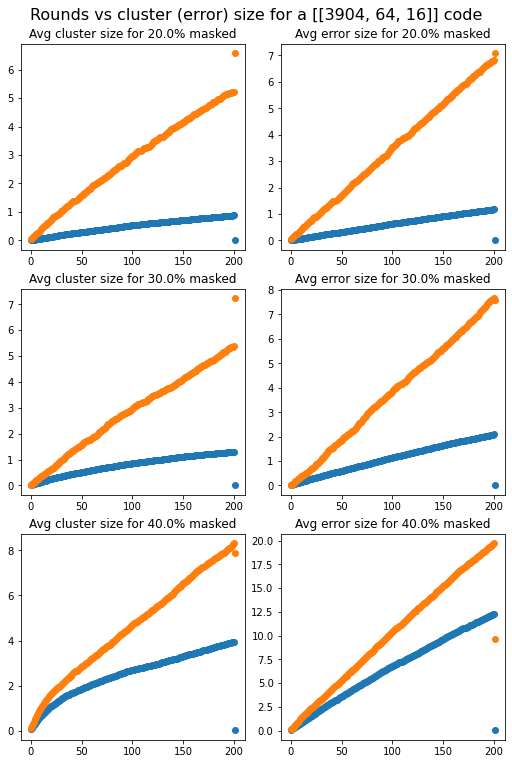

In [37]:
fig, ax = plt.subplots(len(masks), len(types), figsize=(3.5*len(types), 3.5*len(masks)), constrained_layout=True)

for i, mask in enumerate(masks):
    for j, type in enumerate(types):
        num_df = dfs[i][j]
        successes = num_df[num_df["success"] == 1]
        fails = num_df[num_df["success"] == 0]

        success_data = [successes[i].mean() for i in range(len(successes.iloc[0])-1)]
        fails_data = [fails[i].mean() for i in range(len(fails.iloc[0])-1)]

        xs = np.arange(202)

        ax[i][j].set_title(f"Avg {types[j]} size for {masks[i]*100}% masked")
        ax[i][j].scatter(xs, success_data, label='successes')
        ax[i][j].scatter(xs, fails_data, label='failures')
        # plt.legend(loc='upper left')

fig.suptitle("Rounds vs cluster (error) size for a [[3904, 64, 16]] code", fontsize=16)